In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import folium
import matplotlib.colors as mcolors

In [2]:
m = folium.Map([33.447046773463654, -112.08091337731709], zoom_start=5)

In [3]:
cities = pd.read_csv('./../../CSVs/RAW/Cities and cars concentration- Important US cities.csv', delimiter=',')
cities[['lon', 'lat']] = cities['WKT'].str.extract(r'POINT \(([^ ]+) ([^)]+)\)').astype(float)
cities['Name'] = cities['Nombre']
cities['Cars'] = cities['Descripción']
cities

,WKT,Nombre,Descripción,lon,lat,Name,Cars
0,POINT (-118.242643 34.0549076),Los Ángeles,7000000,-118.242643,34.054908,Los Ángeles,7000000
1,POINT (-74.0059728 40.7127753),Nueva York,21000000,-74.005973,40.712775,Nueva York,21000000
2,POINT (-95.37011079999999 29.7600771),Houston,3000000,-95.370111,29.760077,Houston,3000000
3,POINT (-87.6297982 41.8781136),Chicago,13000000,-87.629798,41.878114,Chicago,13000000
4,POINT (-112.0776781 33.4482266),Phoenix,12000000,-112.077678,33.448227,Phoenix,12000000
5,POINT (-96.79698789999999 32.7766642),Dallas,11000000,-96.796988,32.776664,Dallas,11000000
6,POINT (-117.1610838 32.715738),San Diego,1000000,-117.161084,32.715738,San Diego,1000000
7,POINT (-98.4945922 29.4251905),San Antonio,900000,-98.494592,29.425190,San Antonio,900000
8,POINT (-75.1652215 39.9525839),Filadelfia,800000,-75.165222,39.952584,Filadelfia,800000
9,POINT (-121.8852525 37.33874),San José,700000,-121.885253,37.338740,San José,700000


In [4]:
rad_lat = np.radians(cities['lat'])
rad_lon = np.radians(cities['lon'])

cities['x'] = np.cos(rad_lat) * np.cos(rad_lon)
cities['y'] = np.cos(rad_lat) * np.sin(rad_lon)
cities['z'] = np.sin(rad_lat)
cities

,WKT,Nombre,Descripción,lon,lat,Name,Cars,x,y,z
0,POINT (-118.242643 34.0549076),Los Ángeles,7000000,-118.242643,34.054908,Los Ángeles,7000000,-0.392052,-0.729869,0.559987
1,POINT (-74.0059728 40.7127753),Nueva York,21000000,-74.005973,40.712775,Nueva York,21000000,0.208854,-0.728647,0.652267
2,POINT (-95.37011079999999 29.7600771),Houston,3000000,-95.370111,29.760077,Houston,3000000,-0.081246,-0.864301,0.496369
3,POINT (-87.6297982 41.8781136),Chicago,13000000,-87.629798,41.878114,Chicago,13000000,0.030792,-0.743930,0.667548
4,POINT (-112.0776781 33.4482266),Phoenix,12000000,-112.077678,33.448227,Phoenix,12000000,-0.313614,-0.773203,0.551183
5,POINT (-96.79698789999999 32.7766642),Dallas,11000000,-96.796988,32.776664,Dallas,11000000,-0.099509,-0.834878,0.541366
6,POINT (-117.1610838 32.715738),San Diego,1000000,-117.161084,32.715738,San Diego,1000000,-0.384077,-0.748582,0.540471
7,POINT (-98.4945922 29.4251905),San Antonio,900000,-98.494592,29.425190,San Antonio,900000,-0.128660,-0.861443,0.491287
8,POINT (-75.1652215 39.9525839),Filadelfia,800000,-75.165222,39.952584,Filadelfia,800000,0.196268,-0.741025,0.642153
9,POINT (-121.8852525 37.33874),San José,700000,-121.885253,37.338740,San José,700000,-0.419968,-0.675095,0.606526


In [5]:
X = cities[['x', 'y', 'z']]

In [6]:
k_values = range(2, 5)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, cluster_labels))

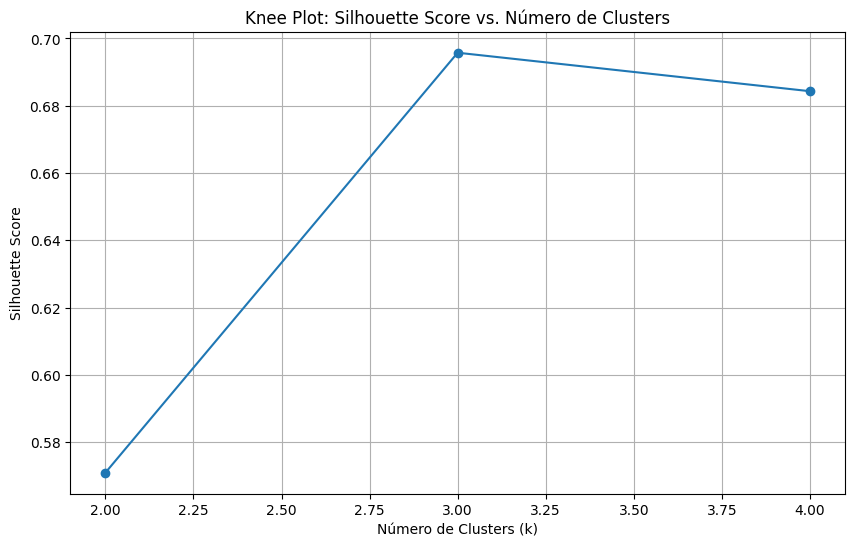

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Knee Plot: Silhouette Score vs. Número de Clusters')
plt.grid(True)
plt.show()

In [8]:
k=3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X)
sil_score = silhouette_score(X, cluster_labels)
print(f"Silhouette Score: {sil_score:.4f}")

Silhouette Score: 0.6957


In [9]:
cities['cluster'] = cluster_labels
cities

,WKT,Nombre,Descripción,lon,lat,Name,Cars,x,y,z,cluster
0,POINT (-118.242643 34.0549076),Los Ángeles,7000000,-118.242643,34.054908,Los Ángeles,7000000,-0.392052,-0.729869,0.559987,1
1,POINT (-74.0059728 40.7127753),Nueva York,21000000,-74.005973,40.712775,Nueva York,21000000,0.208854,-0.728647,0.652267,0
2,POINT (-95.37011079999999 29.7600771),Houston,3000000,-95.370111,29.760077,Houston,3000000,-0.081246,-0.864301,0.496369,2
3,POINT (-87.6297982 41.8781136),Chicago,13000000,-87.629798,41.878114,Chicago,13000000,0.030792,-0.743930,0.667548,0
4,POINT (-112.0776781 33.4482266),Phoenix,12000000,-112.077678,33.448227,Phoenix,12000000,-0.313614,-0.773203,0.551183,1
5,POINT (-96.79698789999999 32.7766642),Dallas,11000000,-96.796988,32.776664,Dallas,11000000,-0.099509,-0.834878,0.541366,2
6,POINT (-117.1610838 32.715738),San Diego,1000000,-117.161084,32.715738,San Diego,1000000,-0.384077,-0.748582,0.540471,1
7,POINT (-98.4945922 29.4251905),San Antonio,900000,-98.494592,29.425190,San Antonio,900000,-0.128660,-0.861443,0.491287,2
8,POINT (-75.1652215 39.9525839),Filadelfia,800000,-75.165222,39.952584,Filadelfia,800000,0.196268,-0.741025,0.642153,0
9,POINT (-121.8852525 37.33874),San José,700000,-121.885253,37.338740,San José,700000,-0.419968,-0.675095,0.606526,1


In [10]:
centroids = kmeans.cluster_centers_

centroids_lat = np.degrees(np.arcsin(centroids[:, 2]))
centroids_lon = np.degrees(np.arctan2(centroids[:, 1], centroids[:, 0]))

centroids_df = pd.DataFrame({'cluster': range(k), 'lat': centroids_lat, 'lon': centroids_lon})

print(centroids_df)

   cluster        lat         lon
0        0  40.843087  -78.859542
1        1  34.370492 -117.286139
2        2  30.642112  -96.889974


In [11]:
unique_clusters = np.unique(cluster_labels)

colors = [plt.cm.viridis(i / (len(unique_clusters) - 1)) for i in range(len(unique_clusters))]

cluster_colors = {cluster: mcolors.to_hex(colors[i]) for i, cluster in enumerate(unique_clusters)}

cities['color'] = cities['cluster'].map(cluster_colors)
unique_clusters

array([0, 1, 2], dtype=int32)

In [12]:
def mark_on_map(row):
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=5,
        color=row['color'],
        fill=True,
        fill_color=row['color'],
        fill_opacity=0.7,
        popup=f"Cluster: {row['cluster']} - Cars {row['Cars']}"
    ).add_to(m)

cities.apply(mark_on_map, axis=1)

m

In [13]:
# def mark_centroids(row):
#     folium.Marker(
#         location=[row['lat'], row['lon']],
#         tooltip=folium.Tooltip(f'Longitude: {row['lon']}\nLatitude: {row['lat']}'),
#         popup=f"Base Centroid {row['cluster']}",
#         icon=folium.Icon(color="green", icon="info-sign")
#     ).add_to(m)

# centroids_df.apply(mark_centroids, axis=1)
# m

In [14]:
def calculate_weight(row):

  row['w'] = 0 if not row['Cars'] else row['Cars']
  return row
  
cities = cities.apply(calculate_weight, axis=1)
cities


,WKT,Nombre,Descripción,lon,lat,Name,Cars,x,y,z,cluster,color,w
0,POINT (-118.242643 34.0549076),Los Ángeles,7000000,-118.242643,34.054908,Los Ángeles,7000000,-0.392052,-0.729869,0.559987,1,#21918c,7000000
1,POINT (-74.0059728 40.7127753),Nueva York,21000000,-74.005973,40.712775,Nueva York,21000000,0.208854,-0.728647,0.652267,0,#440154,21000000
2,POINT (-95.37011079999999 29.7600771),Houston,3000000,-95.370111,29.760077,Houston,3000000,-0.081246,-0.864301,0.496369,2,#fde725,3000000
3,POINT (-87.6297982 41.8781136),Chicago,13000000,-87.629798,41.878114,Chicago,13000000,0.030792,-0.743930,0.667548,0,#440154,13000000
4,POINT (-112.0776781 33.4482266),Phoenix,12000000,-112.077678,33.448227,Phoenix,12000000,-0.313614,-0.773203,0.551183,1,#21918c,12000000
5,POINT (-96.79698789999999 32.7766642),Dallas,11000000,-96.796988,32.776664,Dallas,11000000,-0.099509,-0.834878,0.541366,2,#fde725,11000000
6,POINT (-117.1610838 32.715738),San Diego,1000000,-117.161084,32.715738,San Diego,1000000,-0.384077,-0.748582,0.540471,1,#21918c,1000000
7,POINT (-98.4945922 29.4251905),San Antonio,900000,-98.494592,29.425190,San Antonio,900000,-0.128660,-0.861443,0.491287,2,#fde725,900000
8,POINT (-75.1652215 39.9525839),Filadelfia,800000,-75.165222,39.952584,Filadelfia,800000,0.196268,-0.741025,0.642153,0,#440154,800000
9,POINT (-121.8852525 37.33874),San José,700000,-121.885253,37.338740,San José,700000,-0.419968,-0.675095,0.606526,1,#21918c,700000


In [15]:
clusters = []
clusters_weight_avgs = []
for cluster_id in unique_clusters:
  cluster = cities[cities['cluster'] == cluster_id]
  clusters.append(cluster.index)
  
  
  cluster = cluster[cluster['w'] > 0]
  cluster_avg = np.average(cluster['w'])
  
  clusters_weight_avgs.append(cluster_avg)

print(clusters_weight_avgs)
print(clusters)


[np.float64(11600000.0), np.float64(5175000.0), np.float64(4966666.666666667)]
[Index([1, 3, 8], dtype='int64'), Index([0, 4, 6, 9], dtype='int64'), Index([2, 5, 7], dtype='int64')]


In [16]:
#Fill the empty spaces with the current average

for rowIndex in range(len(cities)):
  row = cities.loc[rowIndex]
  if row['w'] == 0:
    cities.at[rowIndex,'w'] = clusters_weight_avgs[row['cluster']]
    

cities

,WKT,Nombre,Descripción,lon,lat,Name,Cars,x,y,z,cluster,color,w
0,POINT (-118.242643 34.0549076),Los Ángeles,7000000,-118.242643,34.054908,Los Ángeles,7000000,-0.392052,-0.729869,0.559987,1,#21918c,7000000
1,POINT (-74.0059728 40.7127753),Nueva York,21000000,-74.005973,40.712775,Nueva York,21000000,0.208854,-0.728647,0.652267,0,#440154,21000000
2,POINT (-95.37011079999999 29.7600771),Houston,3000000,-95.370111,29.760077,Houston,3000000,-0.081246,-0.864301,0.496369,2,#fde725,3000000
3,POINT (-87.6297982 41.8781136),Chicago,13000000,-87.629798,41.878114,Chicago,13000000,0.030792,-0.743930,0.667548,0,#440154,13000000
4,POINT (-112.0776781 33.4482266),Phoenix,12000000,-112.077678,33.448227,Phoenix,12000000,-0.313614,-0.773203,0.551183,1,#21918c,12000000
5,POINT (-96.79698789999999 32.7766642),Dallas,11000000,-96.796988,32.776664,Dallas,11000000,-0.099509,-0.834878,0.541366,2,#fde725,11000000
6,POINT (-117.1610838 32.715738),San Diego,1000000,-117.161084,32.715738,San Diego,1000000,-0.384077,-0.748582,0.540471,1,#21918c,1000000
7,POINT (-98.4945922 29.4251905),San Antonio,900000,-98.494592,29.425190,San Antonio,900000,-0.128660,-0.861443,0.491287,2,#fde725,900000
8,POINT (-75.1652215 39.9525839),Filadelfia,800000,-75.165222,39.952584,Filadelfia,800000,0.196268,-0.741025,0.642153,0,#440154,800000
9,POINT (-121.8852525 37.33874),San José,700000,-121.885253,37.338740,San José,700000,-0.419968,-0.675095,0.606526,1,#21918c,700000


In [17]:
#Calculate weights
clusters_weights = []

for cluster in clusters:
  members = cities.loc[cluster]
  cluster_weight = np.sum(members['w'])
  clusters_weights.append(cluster_weight)

clusters_weights


[np.int64(34800000), np.int64(20700000), np.int64(14900000)]

In [18]:
for index, cluster in enumerate(clusters):
  cluster_weight = clusters_weights[index]  
  for point_index in cluster:
    point = cities.loc[point_index]
    if point['w'] > 1:
      cities.at[point_index, 'w'] = point['w'] / cluster_weight if cluster_weight else np.int64(1/len(cluster))


cities


C:\Users\octav\AppData\Local\Temp\ipykernel_29372\2288069042.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.603448275862069' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  cities.at[point_index, 'w'] = point['w'] / cluster_weight if cluster_weight else np.int64(1/len(cluster))


,WKT,Nombre,Descripción,lon,lat,Name,Cars,x,y,z,cluster,color,w
0,POINT (-118.242643 34.0549076),Los Ángeles,7000000,-118.242643,34.054908,Los Ángeles,7000000,-0.392052,-0.729869,0.559987,1,#21918c,0.338164
1,POINT (-74.0059728 40.7127753),Nueva York,21000000,-74.005973,40.712775,Nueva York,21000000,0.208854,-0.728647,0.652267,0,#440154,0.603448
2,POINT (-95.37011079999999 29.7600771),Houston,3000000,-95.370111,29.760077,Houston,3000000,-0.081246,-0.864301,0.496369,2,#fde725,0.201342
3,POINT (-87.6297982 41.8781136),Chicago,13000000,-87.629798,41.878114,Chicago,13000000,0.030792,-0.743930,0.667548,0,#440154,0.373563
4,POINT (-112.0776781 33.4482266),Phoenix,12000000,-112.077678,33.448227,Phoenix,12000000,-0.313614,-0.773203,0.551183,1,#21918c,0.579710
5,POINT (-96.79698789999999 32.7766642),Dallas,11000000,-96.796988,32.776664,Dallas,11000000,-0.099509,-0.834878,0.541366,2,#fde725,0.738255
6,POINT (-117.1610838 32.715738),San Diego,1000000,-117.161084,32.715738,San Diego,1000000,-0.384077,-0.748582,0.540471,1,#21918c,0.048309
7,POINT (-98.4945922 29.4251905),San Antonio,900000,-98.494592,29.425190,San Antonio,900000,-0.128660,-0.861443,0.491287,2,#fde725,0.060403
8,POINT (-75.1652215 39.9525839),Filadelfia,800000,-75.165222,39.952584,Filadelfia,800000,0.196268,-0.741025,0.642153,0,#440154,0.022989
9,POINT (-121.8852525 37.33874),San José,700000,-121.885253,37.338740,San José,700000,-0.419968,-0.675095,0.606526,1,#21918c,0.033816


In [19]:
cleaned_df = cities[['Name', 'lon', 'lat', 'Cars', 'x', 'y', 'z']]
cleaned_df.to_csv('../../CSVs/Geographical/GEOGRAPHICAL cities-cars-concentration-with-weight.csv', index=False)


In [20]:
for cluster in clusters:
  members = cities.loc[cluster]
  print(np.sum(members['w']))

1.0
1.0
1.0


In [21]:
clusters_coordinates: list[tuple[float, float, float]] = []

for index, cluster in enumerate(clusters):
  xw = 0
  yw = 0
  zw = 0
  for point_index in cluster:
    point = cities.loc[point_index]
    xw += point['w'] * point['x']
    yw += point['w'] * point['y']
    zw += point['w'] * point['z']
  
  clusters_coordinates.append([xw, yw, zw])

# Convert clusters_coordinates to a NumPy array for slicing
clusters_coordinates = np.array(clusters_coordinates)

clusters_coordinates_lat = np.degrees(np.arcsin(clusters_coordinates[:, 2]))
clusters_coordinates_lon = np.degrees(np.arctan2(clusters_coordinates[:, 1], clusters_coordinates[:, 0]))

clusters_coordinates_df = pd.DataFrame({'cluster': range(k), 'lat': clusters_coordinates_lat, 'lon': clusters_coordinates_lon})
clusters_coordinates_df

,cluster,lat,lon
0,0,41.127987,-79.056546
1,1,33.746154,-114.720010
2,2,31.956900,-96.608228


In [22]:
def mark_centroids(row):
    folium.Marker(
        location=[row['lat'], row['lon']],
        tooltip=folium.Tooltip(f'Longitude: {row['lon']}\nLatitude: {row['lat']}'),
        popup=f"Weighted Centroid\n{row['cluster']}",
        icon=folium.Icon(color="red", icon="info-sign")
    ).add_to(m)


clusters_coordinates_df.apply(mark_centroids, axis=1)
m

In [23]:
html = m._repr_html_()

with open('./map.html', mode='w') as html_file:
  html_file.write(html)